In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


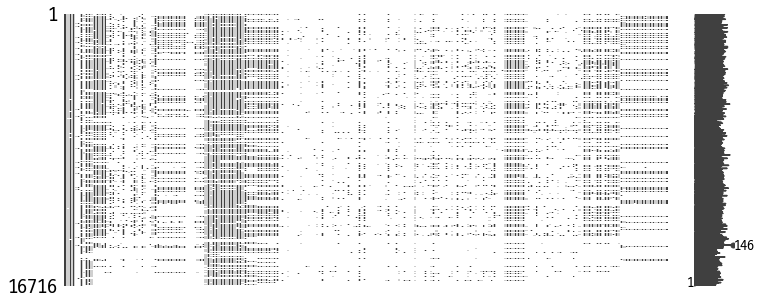

In [9]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12, 5))

- 16,716 명의 데이터와 228개의 선다형 객관식 문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

## 설문통계

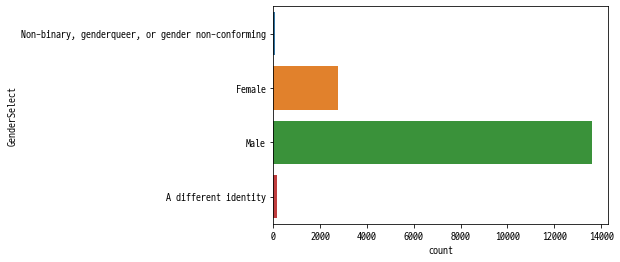

In [10]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [11]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)

# 'Country' 컬럼을 인덱스로 지정해주고
con_df['국가'] = con_df.index

# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']

# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

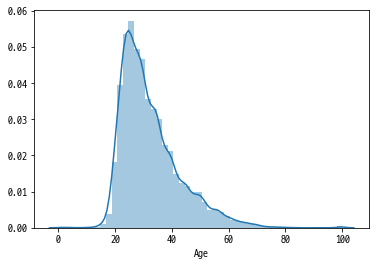

In [13]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.

## 학력

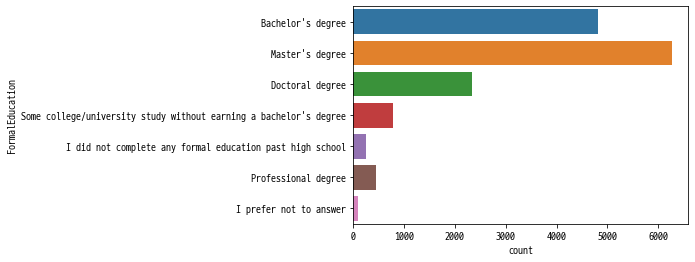

In [14]:
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사 학위를 가지고 있는 사람들도 많다.

## 전공

In [15]:
# value_counts를 사용하면 그룹회 된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션을 사용하면,
# 해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


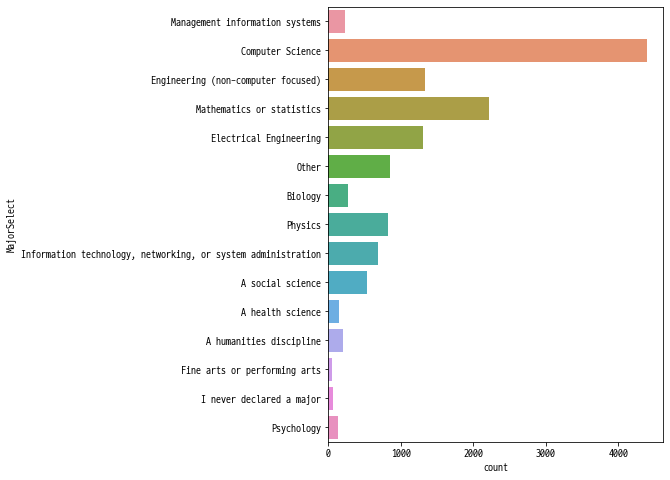

In [16]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

### 취업 여부

In [17]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


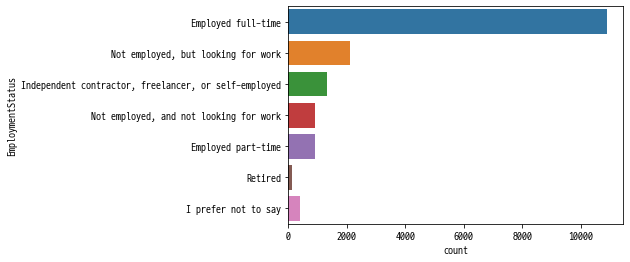

In [18]:
sns.countplot(y='EmploymentStatus', data=mcq)

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

## 프로그래밍 경험
- 'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

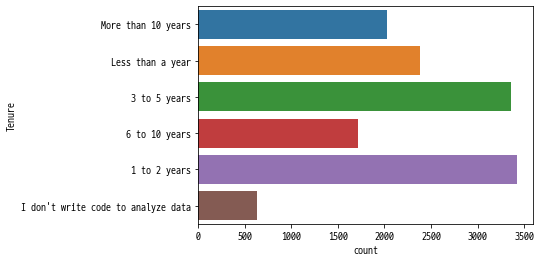

In [19]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


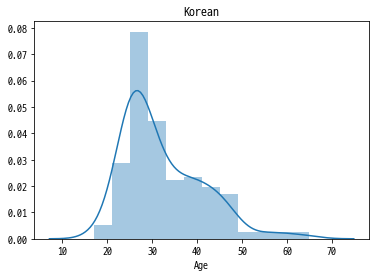

In [21]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [22]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

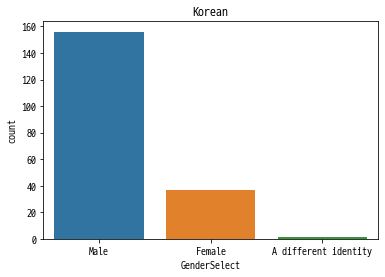

In [23]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

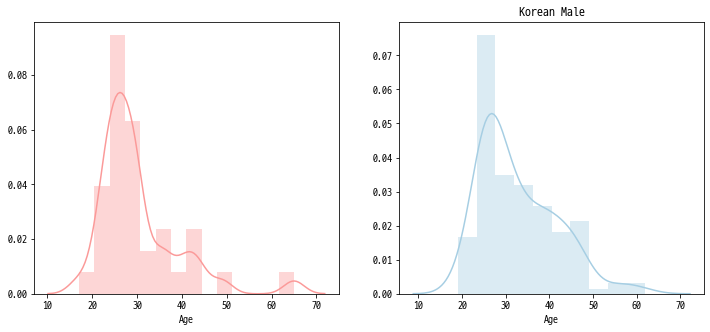

In [24]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), 
             norm_hist=False,
             color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), 
             norm_hist=False,
             color=sns.color_palette('Paired')[0], ax=ax2)
plt.title('Korean Male')

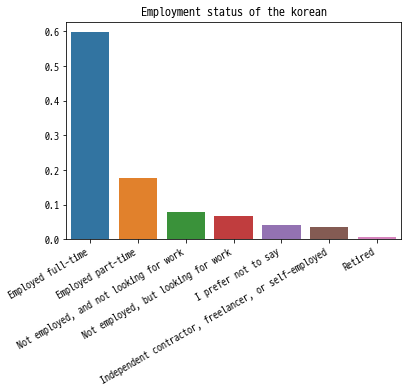

In [26]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts() / len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

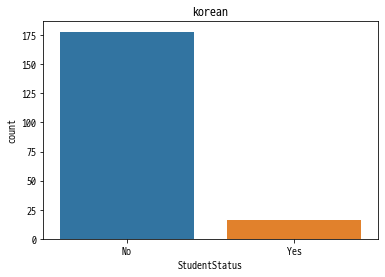

In [27]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [28]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


## 자주 묻는 질문 FAQ

- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

### Q1. Python과 R중 어떤 언어를 배워야 할까요?

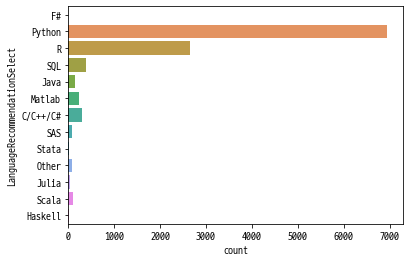

In [29]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아본다.

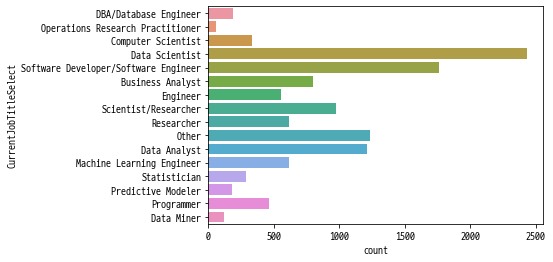

In [30]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [31]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7737, 228)


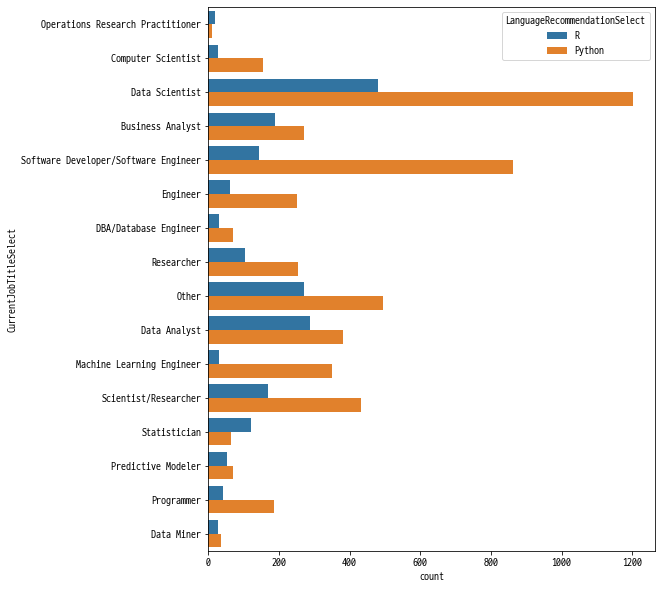

In [32]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R')]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
              hue='LanguageRecommendationSelect',
              data=data)

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계학자들이다.

### Q2. 데이터사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?

- 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

### 데이터사이언스 툴

In [33]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


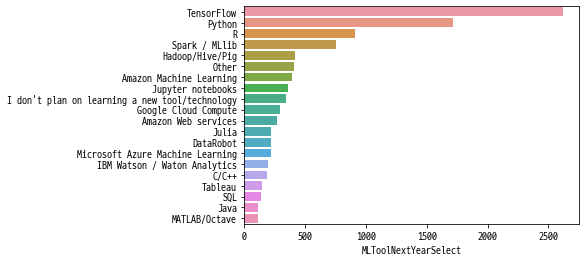

In [36]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다. 그리고 Python이 15%, R은 8%로 따르고 있다.
클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IMB Watson 순으로 응답되었다.

### 다음 해에 주목할 만한 Data Science Methods

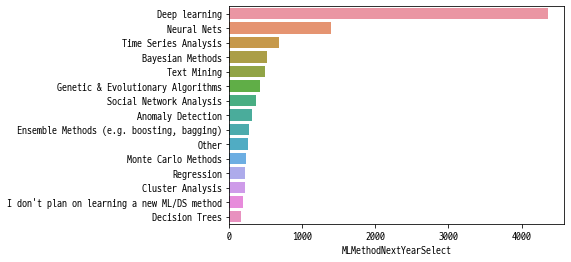

In [40]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다.

### Q3. 어디에서 데이터사이언스를 배워야 할까요?

In [41]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s= mcq.apply(lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

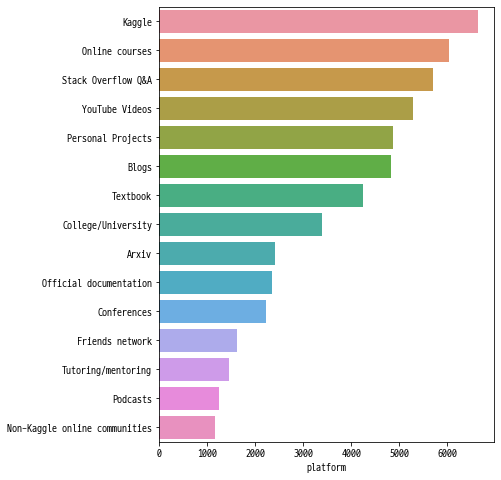

In [42]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

- Kaggle은 우리 응답자들 사이에서 가장 인기있는 학습 플랫폼
- 그러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음
- 온라인 코스, 스택 오버플로 및 유튜브(YouTube) 상위 5대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [43]:
# 설문 내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [44]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

In [ ]:
# 학습 플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
